# Customer Service Request Analysis

## DESCRIPTION
You've been asked to perform data analysis of service request (311) calls from New York City. You've also been asked to utilize data wrangling techniques to understand the pattern in the data and visualize the major types of complaints.

### Perform the following steps:

1. Understand the dataset:

> Identify the shape of the dataset

> Identify variables with null values
     
2. Perform basic data exploratory analysis:

> Utilize missing value treatment

> Analyze the date column and remove the entries if it has an incorrect timeline

> Draw a frequency plot for city-wise complaints

> Draw scatter and hexbin plots for complaint concentration across Brooklyn
       
3.  Find major types of complaints:

> Plot a bar graph of count vs. complaint types

> Find the top 10 types of complaints

> Display the types of complaints in each city in a separate dataset
        
4. Visualize the major types of complaints in each city

5. Check if the average response time across various types of complaints

6. Identify significant variables by performing a statistical analysis using p-values and chi-square values (Optional)

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings
warnings.filterwarnings("ignore")

### Read the Dataset

In [2]:
data= pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", low_memory= False,parse_dates=['Created Date', 'Closed Date', 'Resolution Action Updated Date'],index_col='Unique Key')
data.head()
## date columns are parsed to perform data exploratory analysis

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


### 1. Understand the Dataset
#### *Identify the shape of the data set*

In [5]:
#Shape of the data set
data.shape

(364558, 52)

#### *Identify the variables with null values*

In [6]:
#Variables with null values
data.isna().sum()

Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough                                0
X Coordinate (St

### 2. Perform Basic data exploratory analysis

#### *Missing value Treatment*

In [7]:
# Drop the columns which has null values
data1= data.drop(["School or Citywide Complaint","Vehicle Type","Taxi Company Borough","Taxi Pick Up Location","Bridge Highway Name","Bridge Highway Direction","Road Ramp","Bridge Highway Segment","Garage Lot Name","Ferry Direction","Ferry Terminal Name"],axis=1)
data1.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


#### *Analyze the date column and remove the entries if it has an incorrect timeline*

In [50]:
# drop the null rows in closed date and Resolution Action updated date
data1=data1.dropna(subset=['Closed Date','Resolution Action Updated Date'],axis=0)
data1=data1[data1['Closed Date']>=data1['Created Date']]
data1.info()
#data1.loc[data1['Closed Date']<data1['Created Date']] ## to check any complaint closed date less than created date

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362138 entries, 32310363 to 29611816
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Created Date                    362138 non-null  datetime64[ns]
 1   Closed Date                     362138 non-null  datetime64[ns]
 2   Agency                          362138 non-null  object        
 3   Agency Name                     362138 non-null  object        
 4   Complaint Type                  362138 non-null  object        
 5   Descriptor                      355644 non-null  object        
 6   Location Type                   362045 non-null  object        
 7   Incident Zip                    361463 non-null  float64       
 8   Incident Address                310459 non-null  object        
 9   Street Name                     310459 non-null  object        
 10  Cross Street 1                  306814 non-null

#### *Draw a frequency plot for city-wise complaints*

In [91]:
# City-wise complaints
citywise_complaint=pd.DataFrame({'Count':data1[["City"]].value_counts()})
citywise_complaint

,Count
City,
BROOKLYN,118849
NEW YORK,77289
BRONX,49166
STATEN ISLAND,15335
JAMAICA,8930
ASTORIA,7991
FLUSHING,7486
RIDGEWOOD,6391
CORONA,5383


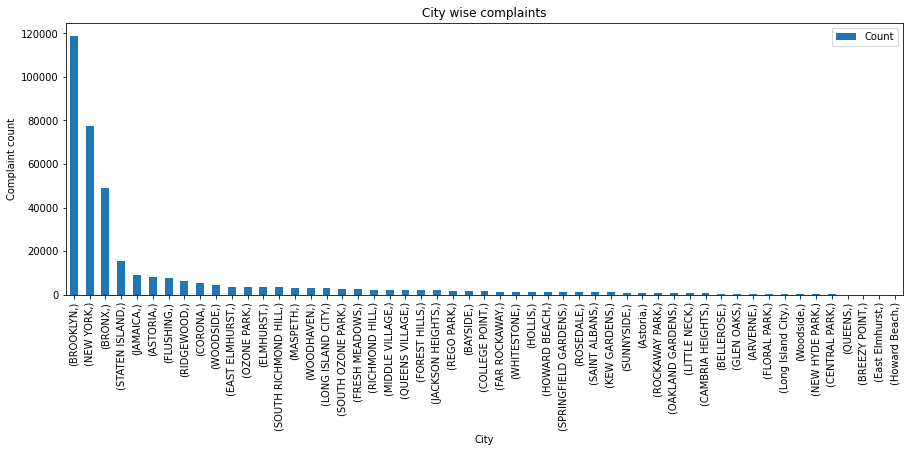

In [92]:
citywise_complaint.plot(kind="bar",figsize=(15,5),title="City wise complaints")
plt.xlabel('City')
plt.ylabel('Complaint count');

#### *Draw scatter and hexbin plots for complaint concentration across Brooklyn*

In [82]:
#Filtering the data for Brooklyn city
data_Brooklyn=data1[data1["City"]=="BROOKLYN"]
data_Brooklyn.shape

(118841, 42)

In [111]:
#Complaint types in Brooklyn city
Brooklyn_Complaints=data_Brooklyn[["Complaint Type"]].value_counts()
Brooklyn_Complaints

Complaint Type           
Blocked Driveway             36444
Illegal Parking              33528
Noise - Street/Sidewalk      13982
Noise - Commercial           13855
Derelict Vehicle              6257
Noise - Vehicle               5965
Animal Abuse                  3191
Noise - Park                  1574
Traffic                       1258
Homeless Encampment            947
Vending                        574
Noise - House of Worship       389
Drinking                       291
Urinating in Public            155
Bike/Roller/Skate Chronic      124
Disorderly Youth                79
Illegal Fireworks               61
Graffiti                        60
Posting Advertisement           58
Panhandling                     49
dtype: int64

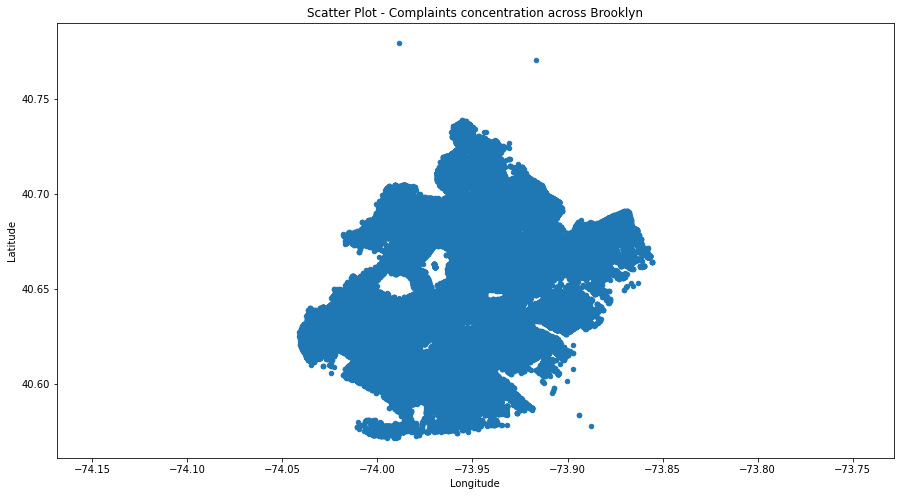

In [109]:
## Scatter plot for Complaints concentration across Brooklyn
data_Brooklyn.plot(kind='scatter', x='Longitude', y='Latitude', figsize=(15,8),title = 'Scatter Plot - Complaints concentration across Brooklyn').axis('equal');

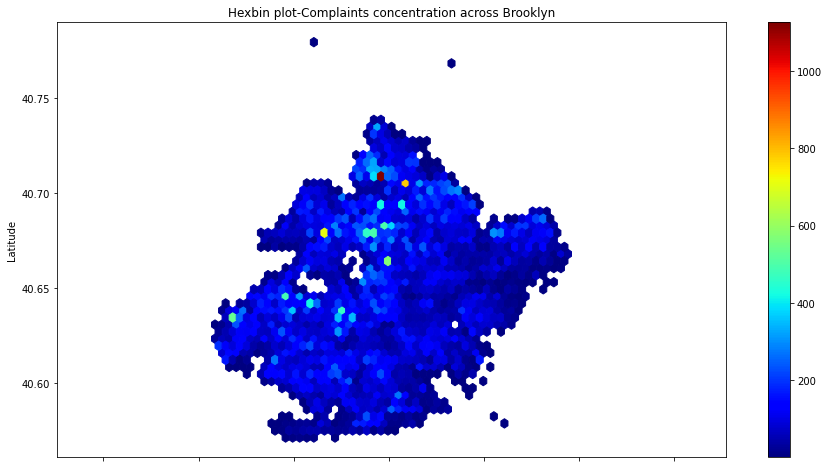

In [110]:
## Hexbin plot for Complaints concentration across Brooklyn
data_Brooklyn.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=50,colormap='jet',mincnt=1,title ='Hexbin plot-Complaints concentration across Brooklyn', figsize=(15,8)).axis('equal');

### 3. Find major types of complaints:

#### *Plot a bar graph of count vs. complaint types*

In [44]:
# complaint types counts
complaint_types=pd.DataFrame({'count':data1[["Complaint Type"]].value_counts()})
complaint_types

,count
Complaint Type,
Blocked Driveway,100624
Illegal Parking,91716
Noise - Street/Sidewalk,51139
Noise - Commercial,43751
Derelict Vehicle,21518
Noise - Vehicle,19301
Animal Abuse,10530
Traffic,5196
Homeless Encampment,4879


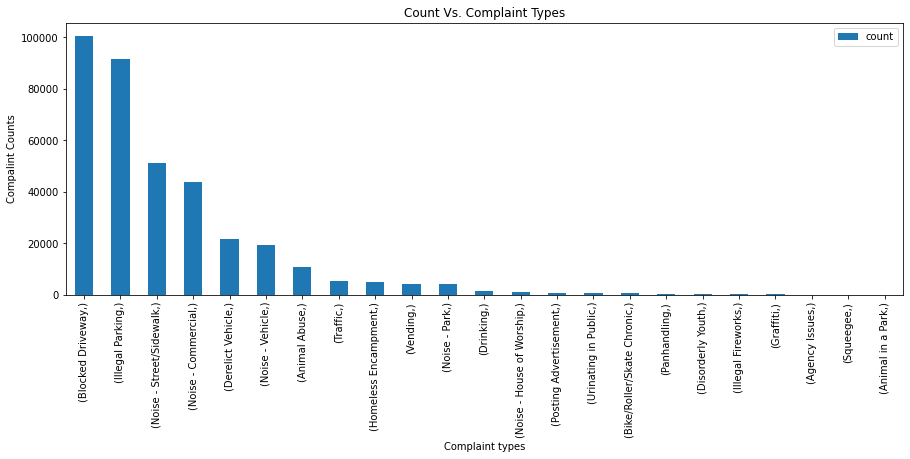

In [49]:
complaint_types.plot(kind="bar",figsize=(15,5),title="Count Vs. Complaint Types")
plt.xlabel('Complaint types')
plt.ylabel('Compalint Counts');

#### *Find the top 10 types of complaints*

In [54]:
complaint_types.head(10)

,count
Complaint Type,
Blocked Driveway,100624
Illegal Parking,91716
Noise - Street/Sidewalk,51139
Noise - Commercial,43751
Derelict Vehicle,21518
Noise - Vehicle,19301
Animal Abuse,10530
Traffic,5196
Homeless Encampment,4879


#### *Display the types of complaints in each city in a separate dataset*

In [94]:
#The types of complaints in each city in a separate dataset
Citywise_complainttype_count=pd.DataFrame({'Count':data1.groupby(["Complaint Type","City"]).size()})
Citywise_complainttype_count.unstack()

Count                                    \
City                      ARVERNE ASTORIA Astoria BAYSIDE BELLEROSE   
Complaint Type                                                        
Animal Abuse                 46.0   170.0     NaN    53.0      15.0   
Animal in a Park              NaN     NaN     NaN     NaN       NaN   
Bike/Roller/Skate Chronic     NaN    16.0     NaN     NaN       1.0   
Blocked Driveway             50.0  3436.0   159.0   514.0     138.0   
Derelict Vehicle             32.0   426.0    14.0   231.0     120.0   
Disorderly Youth              2.0     5.0     NaN     2.0       2.0   
Drinking                      1.0    43.0     NaN     1.0       1.0   
Graffiti                      1.0     4.0     NaN     3.0       NaN   
Homeless Encampment           4.0    32.0     NaN     2.0       1.0   
Illegal Fireworks             NaN     4.0     NaN     NaN       1.0   
Illegal Parking              62.0  1340.0   277.0   638.0     132.0   
Noise - Commercial            2.0  1653.0   310.0    47.0      38.0   
Noise - House of Worship     14.0    21.0     NaN     3.0       1.0   
Noise - Park                  2.0    64.0     NaN     4.0       1.0   
Noise - Street/Sidewalk      29.0   409.0   145.0    17.0      13.0   
Noise - Vehicle              10.0   236.0     NaN    24.0      11.0   
Panhandling                   1.0     2.0     NaN     NaN       1.0   
Posting Advertisement         NaN     3.0     NaN     NaN       1.0   
Squeegee                      NaN     NaN     NaN     NaN       NaN   
Traffic                       1.0    60.0     NaN     9.0       9.0   
Urinating in Public           1.0    10.0     NaN     NaN       1.0   
Vending                       1.0    57.0     NaN     2.0       NaN   

                                                                          \
City                      BREEZY POINT    BRONX BROOKLYN CAMBRIA HEIGHTS   
Complaint Type                                                             
Animal Abuse                       2.0   1971.0   3191.0            15.0   
Animal in a Park                   NaN      NaN      NaN             NaN   
Bike/Roller/Skate Chronic          NaN     22.0    124.0             NaN   
Blocked Driveway                   3.0  17062.0  36445.0           177.0   
Derelict Vehicle                   3.0   2402.0   6257.0           148.0   
Disorderly Youth                   NaN     66.0     79.0             NaN   
Drinking                           1.0    206.0    291.0             NaN   
Graffiti                           NaN     15.0     60.0             NaN   
Homeless Encampment                NaN    275.0    948.0             6.0   
Illegal Fireworks                  NaN     24.0     61.0             1.0   
Illegal Parking                   16.0   9889.0  33532.0           113.0   
Noise - Commercial                 4.0   2944.0  13855.0            19.0   
Noise - House of Worship           NaN     90.0    389.0             2.0   
Noise - Park                       NaN    548.0   1575.0             NaN   
Noise - Street/Sidewalk            1.0   9144.0  13982.0            29.0   
Noise - Vehicle                    1.0   3556.0   5965.0           100.0   
Panhandling                        NaN     20.0     49.0             NaN   
Posting Advertisement              NaN     18.0     58.0             NaN   
Squeegee                           NaN      NaN      NaN             NaN   
Traffic                            NaN    427.0   1258.0             7.0   
Urinating in Public                NaN     54.0    155.0             NaN   
Vending                            NaN    433.0    575.0             NaN   

                                        ...                                \
City                      CENTRAL PARK  ... SAINT ALBANS SOUTH OZONE PARK   
Complaint Type                          ...                                 
Animal Abuse                       NaN  ...         43.0             74.0   
Animal in a Park                   NaN  ...

### 4.Visualize the major types of complaints in each city

In [96]:
Citywise_complainttype_count.sort_values('Count',ascending=False).unstack().head(10)
##Assumed top 10 complaints as majortypes

Count                                    \
City                    ARVERNE ASTORIA Astoria BAYSIDE BELLEROSE   
Complaint Type                                                      
Blocked Driveway           50.0  3436.0   159.0   514.0     138.0   
Illegal Parking            62.0  1340.0   277.0   638.0     132.0   
Noise - Street/Sidewalk    29.0   409.0   145.0    17.0      13.0   
Noise - Commercial          2.0  1653.0   310.0    47.0      38.0   
Noise - Vehicle            10.0   236.0     NaN    24.0      11.0   
Derelict Vehicle           32.0   426.0    14.0   231.0     120.0   
Animal Abuse               46.0   170.0     NaN    53.0      15.0   
Homeless Encampment         4.0    32.0     NaN     2.0       1.0   
Vending                     1.0    57.0     NaN     2.0       NaN   
Traffic                     1.0    60.0     NaN     9.0       9.0   

                                                                        \
City                    BREEZY POINT    BRONX BROOKLYN CAMBRIA HEIGHTS   
Complaint Type                                                           
Blocked Driveway                 3.0  17062.0  36445.0           177.0   
Illegal Parking                 16.0   9889.0  33532.0           113.0   
Noise - Street/Sidewalk          1.0   9144.0  13982.0            29.0   
Noise - Commercial               4.0   2944.0  13855.0            19.0   
Noise - Vehicle                  1.0   3556.0   5965.0           100.0   
Derelict Vehicle                 3.0   2402.0   6257.0           148.0   
Animal Abuse                     2.0   1971.0   3191.0            15.0   
Homeless Encampment              NaN    275.0    948.0             6.0   
Vending                          NaN    433.0    575.0             NaN   
Traffic                          NaN    427.0   1258.0             7.0   

                                      ...                                \
City                    CENTRAL PARK  ... SAINT ALBANS SOUTH OZONE PARK   
Complaint Type                        ...                                 
Blocked Driveway                 NaN  ...        318.0           1202.0   
Illegal Parking                  5.0  ...        237.0            602.0   
Noise - Street/Sidewalk        105.0  ...         81.0            108.0   
Noise - Commercial               NaN  ...         36.0             82.0   
Noise - Vehicle                  NaN  ...         50.0             97.0   
Derelict Vehicle                 NaN  ...        248.0            425.0   
Animal Abuse                     NaN  ...         43.0             74.0   
Homeless Encampment              NaN  ...         11.0              5.0   
Vending                          NaN  ...          2.0              5.0   
Traffic                          NaN  ...         14.0             36.0   

                                                                               \
City                    SOUTH RICHMOND HILL SPRINGFIELD GARDENS STATEN ISLAND   
Complaint Type                                                                  
Blocked Driveway                     1946.0               330.0        2845.0   
Illegal Parking                       596.0               291.0        6224.0   
Noise - Street/Sidewalk                93.0                42.0         885.0   
Noise - Commercial                    223.0                38.0         783.0   
Noise - Vehicle                        93.0                48.0         424.0   
Derelict Vehicle                      356.0               267.0        2184.0   
Animal Abuse                           40.0                42.0         786.0   
Homeless Encampment                    12.0                 7.0          77.0   
Vending                                24.0                 1.0          25.0   
Traffic                                12.0                12.0         229.0   

                                                                          
City                    SUNNYSIDE WHITESTONE WOODHAVEN WOODS

### 5. Check the average response time across various types of complaints

In [74]:
data1["response_time"]=data1['Closed Date'] - data1['Created Date']
#data1["response_time"]=data1["response_time"]/np.timedelta64(1,'D')
data1["response_time"]=data1["response_time"]/np.timedelta64(1,'h') # converted response time in hours
group=data1.groupby("Complaint Type")
#complaint_types_group["response_time"].describe()
Average_response_time=pd.DataFrame({"Avg response time in hours ":group["response_time"].mean()})
Average_response_time

,Avg response time in hours
Complaint Type,
Agency Issues,5.080312
Animal Abuse,5.009043
Animal in a Park,336.842778
Bike/Roller/Skate Chronic,3.645469
Blocked Driveway,4.509039
Derelict Vehicle,7.044693
Disorderly Youth,3.434375
Drinking,3.839250
Graffiti,6.465651
